# Group Assignment #2

This file contains my exploration of City of Los Angeles transit commute share data, downloaded from CensusReporter.org. The author is Bryan Graveline. 

## Import Libraries and Data
In the cell below, we first load the pertinent libraries and then import census data that we uploaded to our Jupyter Notebook from censusreporter.org

In [3]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

gdf = gpd.read_file('acs2019_5yr_B08134_14000US06037185320.geojson')
gdf.head()

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,257.0,86.0,74.0,82.0,67.0,115.0,63.0,...,12.0,1.0,2.0,0.0,12.0,0.0,12.0,24.0,35.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,174.0,9.0,16.0,17.0,20.0,39.0,49.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,425.0,280.0,202.0,277.0,127.0,310.0,146.0,...,17.0,16.0,26.0,0.0,17.0,0.0,17.0,30.0,39.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,183.0,58.0,32.0,151.0,66.0,221.0,79.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,15.0,21.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,215.0,57.0,44.0,69.0,53.0,183.0,86.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Everything looks appropriate here. It appears that the first row is not a summary of the entire city, which means we won't need to delete it from the dataset. 

## Cleaning the dataset
The .head() function showed us that this dataset has 243 columns; that is way too many to be useful. Here, I trim the data to show only the information of most use to me. I then rename the columns and do a quick data integrity check. 

In [4]:
columns_to_keep = ['geoid',
                  'name',
                  'B08134001',
                  'B08134021',
                  'B08134031',
                  'B08134061',
                  'B08134101',
                  'B08134111',
                  'geometry']
gdf = gdf[columns_to_keep]
gdf.head()

,geoid,name,B08134001,B08134021,B08134031,B08134061,B08134101,B08134111,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,1656.0,204.0,59.0,0.0,26.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,1617.0,113.0,9.0,10.0,8.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,2430.0,269.0,68.0,74.0,87.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,1323.0,116.0,48.0,8.0,30.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,1457.0,81.0,26.0,0.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [5]:
list(gdf)

['geoid',
 'name',
 'B08134001',
 'B08134021',
 'B08134031',
 'B08134061',
 'B08134101',
 'B08134111',
 'geometry']

In [6]:
gdf.columns = ['geoid',
              'Name',
              'Total',
              'Drive Alone',
              'Carpool',
              'Public Transportation',
              'Walk',
              'Other',
              'geometry']
gdf.head()

,geoid,Name,Total,Drive Alone,Carpool,Public Transportation,Walk,Other,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,1656.0,204.0,59.0,0.0,26.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,1617.0,113.0,9.0,10.0,8.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,2430.0,269.0,68.0,74.0,87.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,1323.0,116.0,48.0,8.0,30.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,1457.0,81.0,26.0,0.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [7]:
random_tract = gdf.sample()
random_tract.iloc[0]['Total'] == random_tract.iloc[0]['Drive Alone'] + random_tract.iloc[0]['Carpool'] + random_tract.iloc[0]['Public Transportation'] + random_tract.iloc[0]['Walk'] + random_tract.iloc[0]['Other'] 

True

Now our dataset is trimmed to show only the most relevant commute data, the columns are named appropriately, and we did a data integrity check.

## Normalize the dataset

I'm not really interested in the absolute values for each of these commute modes; I'm really interested in the percentage of each tract that used each mode. So, in the cells below I'll create new columns showing the percentages and delete the old columns.

In [8]:
gdf['Drive Alone %'] = gdf['Drive Alone'] / gdf['Total']*100
gdf['Carpool %'] = gdf['Carpool'] / gdf['Total']*100
gdf['Public Transportation %'] = gdf['Public Transportation'] / gdf['Total']*100
gdf['Walk %'] = gdf['Walk'] / gdf['Total']*100
gdf['Other %'] = gdf['Other'] / gdf['Total']*100
del gdf['Drive Alone']
del gdf['Carpool']
del gdf['Public Transportation']
del gdf['Walk']
del gdf['Other']
gdf.head()

,geoid,Name,Total,geometry,Drive Alone %,Carpool %,Public Transportation %,Walk %,Other %
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",85.141388,10.488432,3.033419,0.000000,1.336761
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",92.031873,6.431417,0.512237,0.569152,0.455322
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",82.991803,9.187158,2.322404,2.527322,2.971311
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",86.754098,7.606557,3.147541,0.524590,1.967213
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",93.158568,5.179028,1.662404,0.000000,0.000000


Okay! Now our dataset is downloaded, clean, normalized, and ready for some analysis!

## Preliminary Inspection



In [10]:
gdf.describe()

,Total,Drive Alone %,Carpool %,Public Transportation %,Walk %,Other %
count,1.005000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.667070e+03,73.966558,9.347303,9.750756,3.829050,3.106333
std,5.803746e+04,13.744238,5.066132,9.514916,6.749100,2.998843
min,0.000000e+00,9.931507,0.000000,0.000000,0.000000,0.000000
25%,1.397000e+03,67.972448,5.684877,3.147467,0.730333,1.262196
50%,1.778000e+03,76.538429,8.730443,7.184224,2.099825,2.511394
75%,2.244000e+03,83.580897,12.156955,13.100124,4.114695,4.199078
max,1.841598e+06,100.000000,55.555556,70.695971,78.424658,37.500000


The describe function shows us lots of good info. Across all census tracts, about 74% of folks drive alone to work. Key to our analysis here, less than 10% of folks take transit to work across all census tracts. The median (uninfluenced by outliers, such as the max value of 71%) is all the way down at 7.2%.

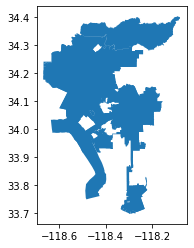

In [11]:
gdf.plot()

Here we see what we would expect - an outline of the City of Los Angeles. Unrelated, but I am new to town and the long skinny line to the port makes zero sense to me. As a lover of unique borders (like Point Roberts, WA and the "Colorado jog") I really need to look into this... okay back to the data exploration.

## Transit Data Deep Dive

Now that we've taken a preliminary look at our data, I want to look more closely at our transit data. I'm going to compare transit use to driving alone, then look at the top transit tracts, and finally create a map showing the tracts with the most transit use.

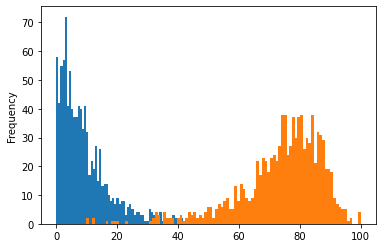

In [16]:
gdf['Public Transportation %'].plot.hist(bins=100)
gdf['Drive Alone %'].plot.hist(bins=100)

Blue is a histogram of transit use and orange is a histogram of driving alone. I weep for our climate.

In [18]:
gdf_sorted = gdf.sort_values(by='Public Transportation %',ascending = False)
gdf_sorted

,geoid,Name,Total,geometry,Drive Alone %,Carpool %,Public Transportation %,Walk %,Other %
569,14000US06037209402,"Census Tract 2094.02, Los Angeles, CA",2184.0,"MULTIPOLYGON (((-118.27988 34.05388, -118.2797...",10.347985,10.393773,70.695971,5.631868,2.930403
560,14000US06037208902,"Census Tract 2089.02, Los Angeles, CA",1455.0,"MULTIPOLYGON (((-118.27468 34.05739, -118.2736...",16.701031,9.347079,59.037801,11.408935,3.505155
562,14000US06037208904,"Census Tract 2089.04, Los Angeles, CA",1927.0,"MULTIPOLYGON (((-118.27185 34.05934, -118.2713...",18.837571,5.396990,58.951738,7.213285,9.600415
536,14000US06037206300,"Census Tract 2063, Los Angeles, CA",795.0,"MULTIPOLYGON (((-118.25041 34.04326, -118.2490...",12.578616,3.899371,56.226415,27.169811,0.125786
563,14000US06037209102,"Census Tract 2091.02, Los Angeles, CA",2929.0,"MULTIPOLYGON (((-118.27065 34.05464, -118.2704...",36.565381,2.628884,52.953226,5.974735,1.877774
...,...,...,...,...,...,...,...,...,...
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",0.0,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438...",NaN,NaN,NaN,NaN,NaN
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",0.0,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026...",NaN,NaN,NaN,NaN,NaN
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",0.0,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480...",NaN,NaN,NaN,NaN,NaN
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464...",NaN,NaN,NaN,NaN,NaN


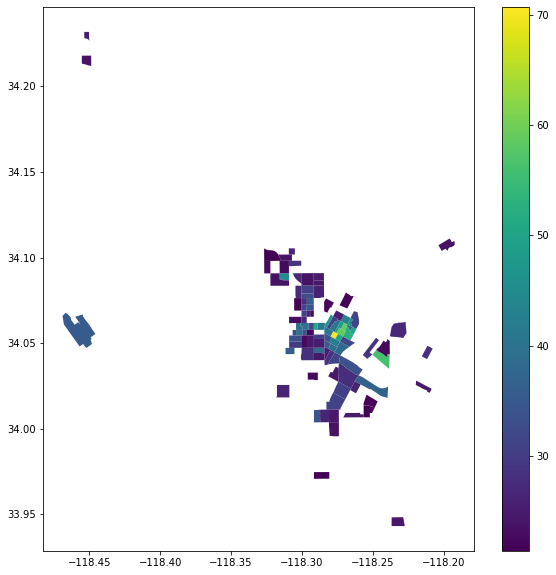

In [34]:
gdf_sorted.head(100).plot(figsize=(10,10),column='Public Transportation %',legend=True)

To no surprise at all, the tracts with the most transit use all appear to be clustered downtown.

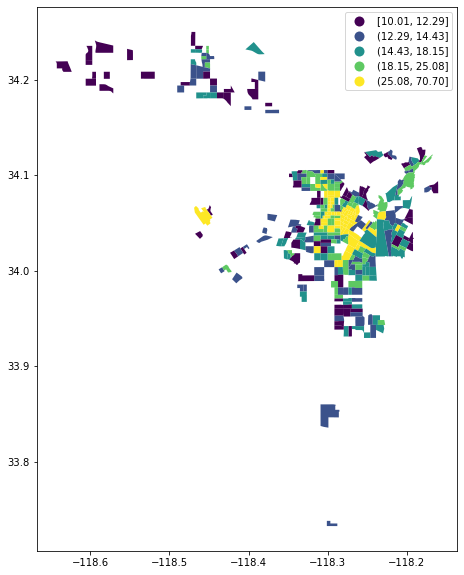

In [46]:
gdftransit = gdf[gdf['Public Transportation %']>10]

gdftransit.plot(figsize=(10,10),
         column='Public Transportation %',
         legend=True,
         scheme = 'quantiles')

Again, this shows that most of the census tracts that take transit a fair amount (the cutoff I used here was 10% or more of the census tract uses transit to commute) are located downtown. I'm not sure what the area to the northwest is, though, so I'll add a basemap. 

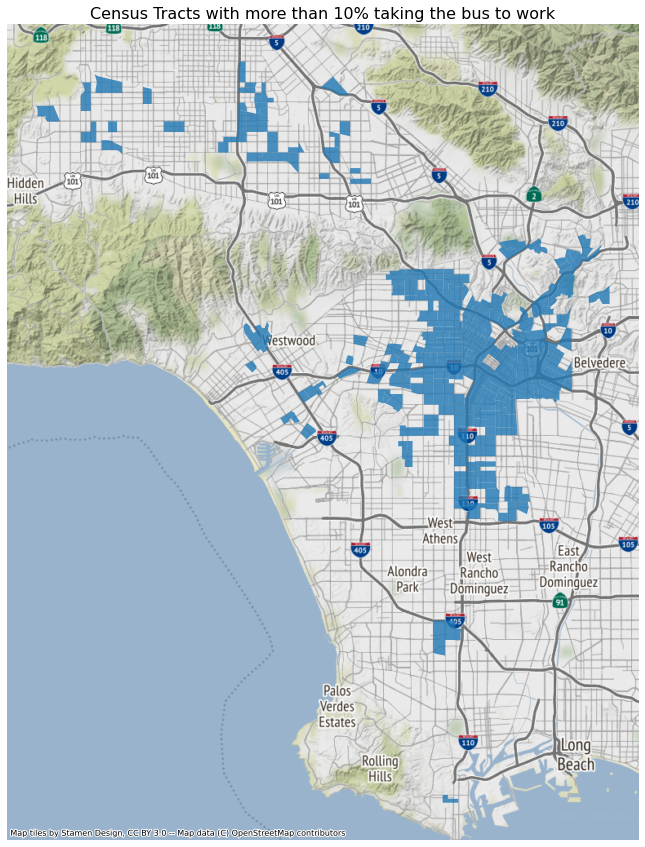

In [48]:
gdftransit_web_mercator = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(15,15))
gdftransit_web_mercator[gdftransit_web_mercator['Public Transportation %']>10].plot(ax=ax, alpha = 0.8)
ax.axis('off')
ax.set_title('Census Tracts with more than 10% taking the bus to work',fontsize=16)
ctx.add_basemap(ax)

That's really interesting that some of these census tracts are in the valley. While I'm new to the area, my stereotype is that the valley is car-central. 